## Applied - Question 8

We will use regression tress to predict Sales from Carseats dataset. 

The question involve Carseats dataset - A simulated data set containing sales of child car seats at 400 different stores.
 1. Sales: thousands
 2. CompPrice: Price charged by competitor at each location
 3. Income: Community income level (in thousands of dollars)
 4. Advertising: Local advertising budget for company at each location (in thousands of dollars)
 5. Population: Population size in region (in thousands)
 6. Price: Price company charges for car seats at each site
 7. ShelveLoc: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car 
    seats at each site
 8. Age: Average age of the local population
 9. Education: Education level at each location
 10. Urban: A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 11. US: A factor with levels No and Yes to indicate whether the store is in the US or not

#### Import block

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydotplus
from IPython.display import Image
from six import StringIO

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,\
    export_graphviz
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, \
    RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

As usual we define the print_tree function to print the tree out for us

In [3]:
# This function return the tree image 
def print_tree(estimator, features, class_names=None, filled=True):    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features,
                    class_names=class_names, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

(a) Import and split data into train and test set

In [4]:
# Read data
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
df = pd.read_csv(f'{data_path}Carseats.csv')
df = df.drop('Unnamed: 0', axis=1)

# Convert ShelveLoc to categorical
for i in ['ShelveLoc', 'Urban', 'US']:
    df[f'{i}'] = df[f'{i}'].astype('category').cat.codes

# Split data
X = df.drop('Sales', axis=1)
y = df.Sales
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,
                                                    random_state=1)

# First look
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


(b) Fit regression tree without any indicators. 

The test RMSE is quite low at only 2.54. And the tree is closed to impossible to 
see at this size. Perhaps a cap for max_depth would be much better for interpretability.

RMSE =  2.5222442883273617


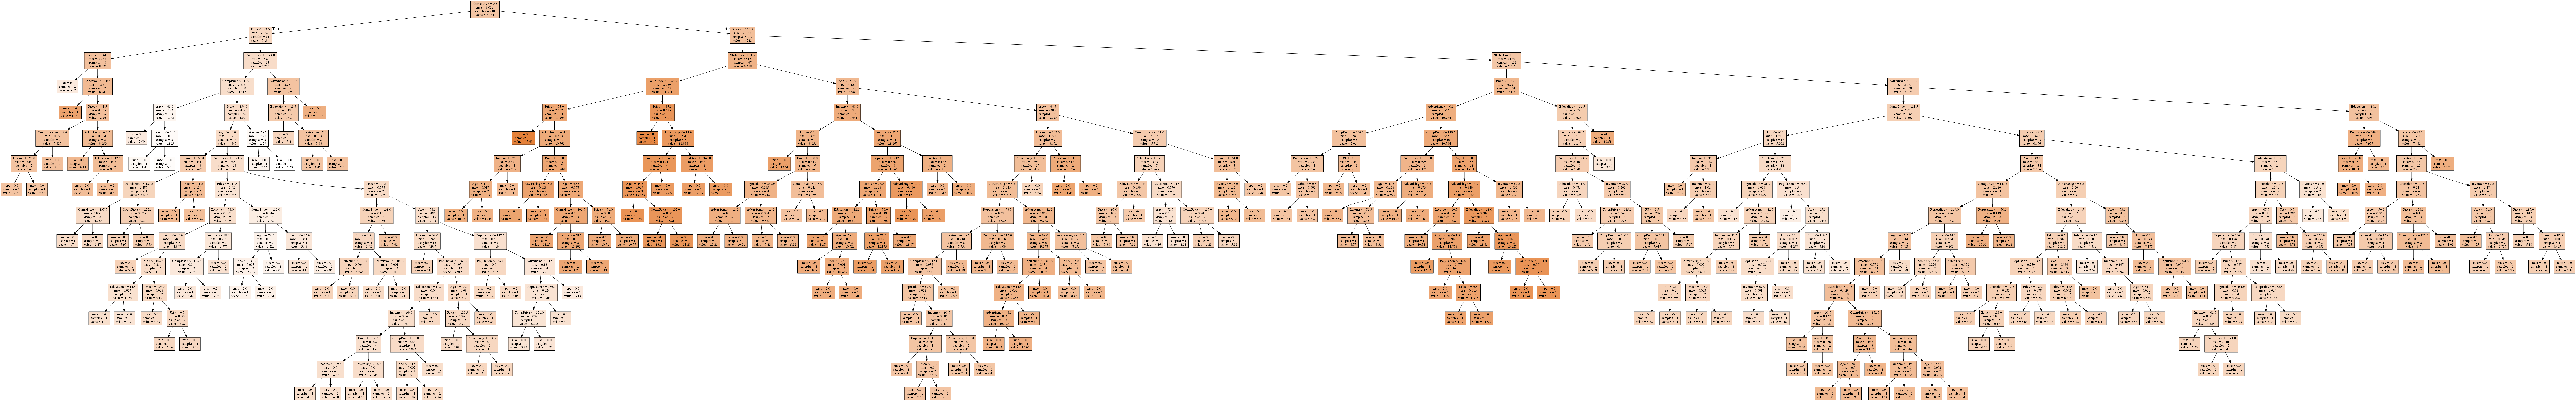

In [5]:
# Regression tree
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)

# Prediction
y_pred = regr.predict(X_test)

# RMSE
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE = ', RMSE)

# Plot tree
graph = print_tree(regr, features=X.columns)
Image(graph.create_png())

(c) Now we usecross validation to find the optimal level of tree complexity. Lets 
define the complexity as max_depth. 

At max_depth = 4 we get the lowest train RMSE. Lets tune the max_leaf nodes after.

Text(0.5, 1.0, 'RMSE vs Max depth')

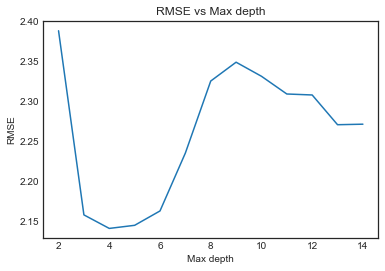

In [6]:
# Setting up CV using 10 fold and parameters
kf = KFold(n_splits=10, shuffle=True, random_state=1)
RMSE = []
depth_range = np.arange(2,15,1)

# Cross validate 
for i in depth_range:
    regr = DecisionTreeRegressor(max_depth=i)
    score = cross_val_score(regr, X_train, y_train, cv=kf, 
                             scoring='neg_mean_squared_error').mean()
    RMSE.append(np.sqrt(-score))
    
# Plot
plt.plot(depth_range, RMSE)
plt.xlabel('Max depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Max depth')

Tuning leaf_nodes using max depth at 4. The result indicate the minimum RMSE
at 11 leaf nodes.

The minimum RMSE occur at nodes  11


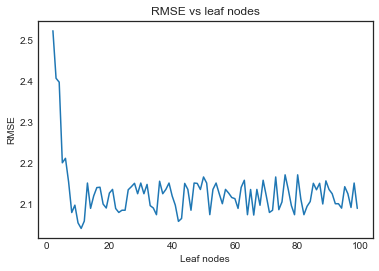

In [7]:
# Tuning leaf_nodes
RMSE = []
max_leaf_nodes = np.arange(2,100,1)

# Cross Validation
for i in max_leaf_nodes:
    regr = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=i)
    score = cross_val_score(regr, X_train, y_train, cv=kf,
                            scoring='neg_mean_squared_error').mean()
    RMSE.append(np.sqrt(-score))
    
# Plot
plt.plot(max_leaf_nodes, RMSE)
plt.xlabel('Leaf nodes')
plt.ylabel('RMSE')
plt.title('RMSE vs leaf nodes')

# The minimum RMSE leaf nodes
print('The minimum RMSE occur at nodes ',max_leaf_nodes[np.argmin(RMSE)])

Now we run the best model on best set to get the test RMSE

In [8]:
regr = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=11)
regr.fit(X_train, y_train)

# Prediction
y_pred = regr.predict(X_test)

# RMSE
print('Test RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

Test RMSE =  2.251658287387998


Compared to the unpruned tree, we see a minor improvement in RMSE. 

(d) Use bagging to analyze the data

Again note that bagging is basically random forest with max_features = n_predictors.
Also, the number of tress won't lead to over fitting

In [9]:
rf = Random



This is happening again
This is happening again
